# Example 2: BUILD A MULTIPLE LAYER PERCEPTRON FOR CANCER CLASSIFICATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))


In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
X = df_cancer.iloc[:,[0,1]]
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [6]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

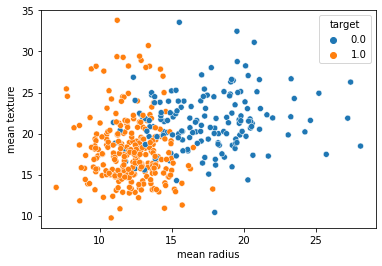

In [7]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

In [8]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)


scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

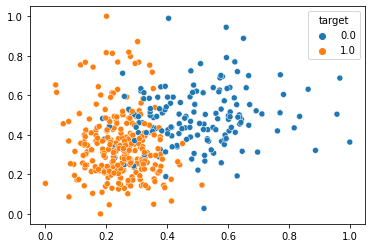

In [9]:

sns.scatterplot(X_train_scaled[:,0], X_train_scaled[:,1], hue=y_train)

In [10]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)



Epoch 1/500
14/14 - 0s - loss: 0.7711
Epoch 2/500
14/14 - 0s - loss: 0.7694
Epoch 3/500
14/14 - 0s - loss: 0.7676
Epoch 4/500
14/14 - 0s - loss: 0.7659
Epoch 5/500
14/14 - 0s - loss: 0.7643
Epoch 6/500
14/14 - 0s - loss: 0.7629
Epoch 7/500
14/14 - 0s - loss: 0.7615
Epoch 8/500
14/14 - 0s - loss: 0.7601
Epoch 9/500
14/14 - 0s - loss: 0.7588
Epoch 10/500
14/14 - 0s - loss: 0.7574
Epoch 11/500
14/14 - 0s - loss: 0.7563
Epoch 12/500
14/14 - 0s - loss: 0.7550
Epoch 13/500
14/14 - 0s - loss: 0.7538
Epoch 14/500
14/14 - 0s - loss: 0.7527
Epoch 15/500
14/14 - 0s - loss: 0.7516
Epoch 16/500
14/14 - 0s - loss: 0.7506
Epoch 17/500
14/14 - 0s - loss: 0.7494
Epoch 18/500
14/14 - 0s - loss: 0.7485
Epoch 19/500
14/14 - 0s - loss: 0.7474
Epoch 20/500
14/14 - 0s - loss: 0.7465
Epoch 21/500
14/14 - 0s - loss: 0.7454
Epoch 22/500
14/14 - 0s - loss: 0.7445
Epoch 23/500
14/14 - 0s - loss: 0.7435
Epoch 24/500
14/14 - 0s - loss: 0.7425
Epoch 25/500
14/14 - 0s - loss: 0.7416
Epoch 26/500
14/14 - 0s - loss: 0.

# LET'S TRY MORE NEURONS

In [11]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)


Epoch 1/500
14/14 - 0s - loss: 0.6829
Epoch 2/500
14/14 - 0s - loss: 0.6723
Epoch 3/500
14/14 - 0s - loss: 0.6614
Epoch 4/500
14/14 - 0s - loss: 0.6503
Epoch 5/500
14/14 - 0s - loss: 0.6371
Epoch 6/500
14/14 - 0s - loss: 0.6220
Epoch 7/500
14/14 - 0s - loss: 0.6042
Epoch 8/500
14/14 - 0s - loss: 0.5844
Epoch 9/500
14/14 - 0s - loss: 0.5621
Epoch 10/500
14/14 - 0s - loss: 0.5379
Epoch 11/500
14/14 - 0s - loss: 0.5124
Epoch 12/500
14/14 - 0s - loss: 0.4869
Epoch 13/500
14/14 - 0s - loss: 0.4584
Epoch 14/500
14/14 - 0s - loss: 0.4308
Epoch 15/500
14/14 - 0s - loss: 0.4047
Epoch 16/500
14/14 - 0s - loss: 0.3832
Epoch 17/500
14/14 - 0s - loss: 0.3629
Epoch 18/500
14/14 - 0s - loss: 0.3464
Epoch 19/500
14/14 - 0s - loss: 0.3329
Epoch 20/500
14/14 - 0s - loss: 0.3207
Epoch 21/500
14/14 - 0s - loss: 0.3135
Epoch 22/500
14/14 - 0s - loss: 0.3035
Epoch 23/500
14/14 - 0s - loss: 0.2988
Epoch 24/500
14/14 - 0s - loss: 0.2910
Epoch 25/500
14/14 - 0s - loss: 0.2889
Epoch 26/500
14/14 - 0s - loss: 0.

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [13]:

# make a prediction
y_predict = model.predict_classes(X_test_scaled)


E:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

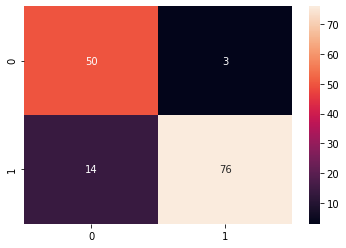

In [14]:

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85        53
         1.0       0.96      0.84      0.90        90

    accuracy                           0.88       143
   macro avg       0.87      0.89      0.88       143
weighted avg       0.90      0.88      0.88       143



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


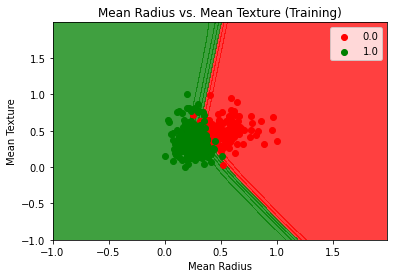

In [16]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [17]:
weights, biases = model.layers[0].get_weights()

In [18]:
weights

array([[-0.2092222 ,  0.5527551 , -0.2343935 , -0.20926245, -0.35221013,
        -0.36603725,  0.11209992,  0.7610948 ,  0.80386984,  0.84134364,
        -0.27981478,  0.02579552,  0.6805419 ,  0.484038  , -0.24532625,
         0.65982693,  0.84791607, -0.20605943,  0.36680084,  0.43765816],
       [ 0.3732265 , -0.103112  , -0.40891138,  0.02856765, -0.49796122,
         0.2422644 , -0.7020915 ,  0.24972378, -0.03118778, -0.191035  ,
        -0.18192586,  0.42449167, -0.0108922 , -0.00863949, -0.13350314,
        -0.1785007 ,  0.5309454 , -0.01548319, -0.7334924 ,  0.35512915]],
      dtype=float32)

In [19]:
biases

array([ 0.18445481, -0.01154126,  0.        ,  0.27278474,  0.        ,
        0.18424547,  0.32082212, -0.04957698, -0.0868791 ,  0.02191521,
        0.        ,  0.27097663, -0.08158551, -0.04759396,  0.        ,
        0.04061108, -0.01634402,  0.22903262,  0.24572587,  0.00090306],
      dtype=float32)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


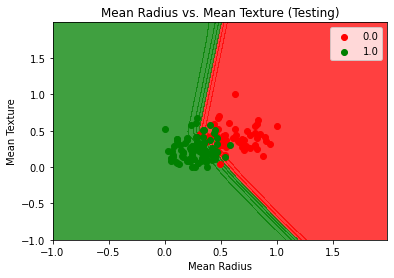

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Testing)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()